# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.

---
## Step 0: Load The Data

We start by writing a helper function that downloads and decompresses the traffic sign image examples. Automating this process would help us when we move the  work to AWS in step 2.  

In [2]:
import os
import sys
import pickle
import numpy as np
import random
import utils
import keras.preprocessing.image as io

Using TensorFlow backend.


In [3]:
data_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"
dest_dir = "traffic-signs-data"
training_file = os.path.join(dest_dir, "train.p")
validation_file= os.path.join(dest_dir, "valid.p")
testing_file = os.path.join(dest_dir, "test.p")
utils.download_and_unzip(data_url, dest_dir, training_file, validation_file, testing_file)

INFO Data set 
traffic-signs-data/train.p, 
traffic-signs-data/valid.p, 
traffic-signs-data/test.p
INFO from url: https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
INFO successfully downloaded and unzipped


In [4]:
# Load pickled data

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

In [5]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_valid, y_valid = shuffle(X_valid, y_valid, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas


In [4]:
utils.get_stats(train['features'], train['labels'], 'Train')
utils.get_stats(valid['features'], valid['labels'], 'Valid')
utils.get_stats(test['features'], test['labels'], 'Test')


Dataset: Train 
Number of examples: 34799
Image data shape: (32, 32, 3)
Min: 0.0000
Max: 255.0000
Mean: 82.6776
Std Dev: 67.8509
Number of classes: 43

Dataset: Valid 
Number of examples: 4410
Image data shape: (32, 32, 3)
Min: 0.0000
Max: 255.0000
Mean: 83.5564
Std Dev: 69.8877
Number of classes: 43

Dataset: Test 
Number of examples: 12630
Image data shape: (32, 32, 3)
Min: 0.0000
Max: 255.0000
Mean: 82.1485
Std Dev: 68.7441
Number of classes: 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import plots

%matplotlib inline
plt.style.use('ggplot')

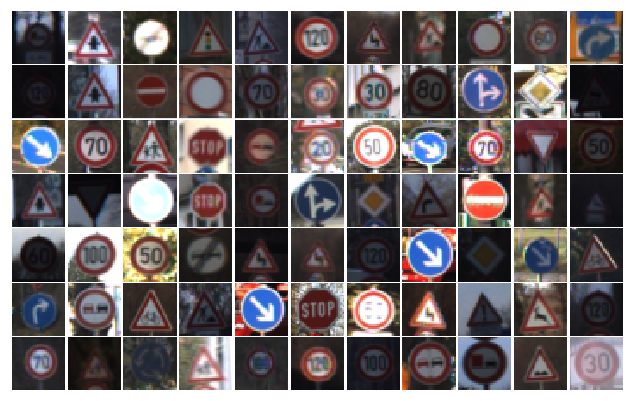

In [15]:
plots.display_square_grid(X_train)

The image above shows sample images from the train dataset. The mean intensity and contrast(difference between brightest pixel and darkest pixel) vary across the samples.

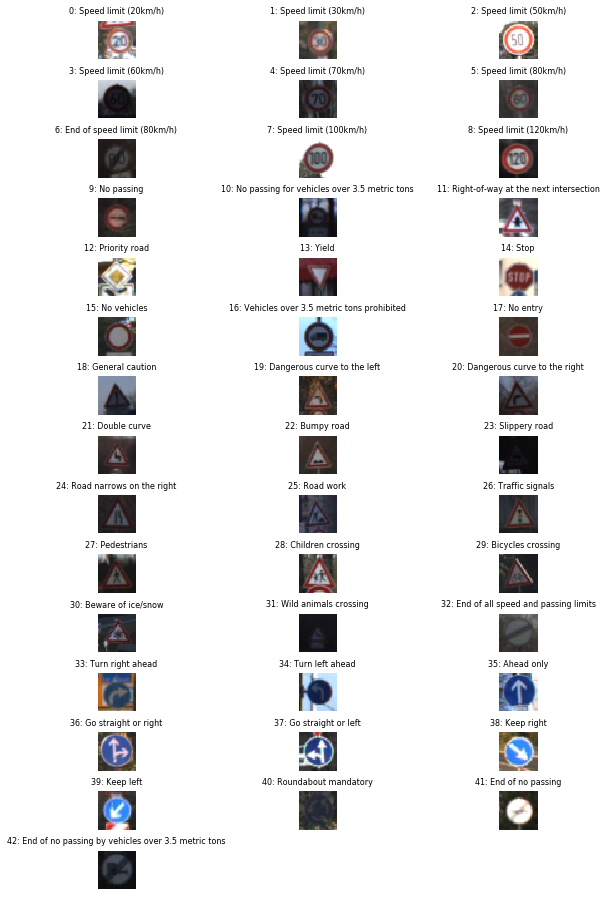

In [8]:
import plots
sign_names = pd.read_csv("traffic-signs-data/signnames.csv")
first_43 = plots.display_w_labels(X_train, y_train, sign_names)

In [10]:
from collections import Counter
import pandas as pd

def get_label_dist(labels):
    ratio = {}
    tmp_count = Counter(labels)
    for k, v in tmp_count.items():
        ratio[k] = 100 * tmp_count[k] / len(labels)
    
    ratio = pd.DataFrame.from_dict(ratio, 'index').sort_index()
    return ratio
    

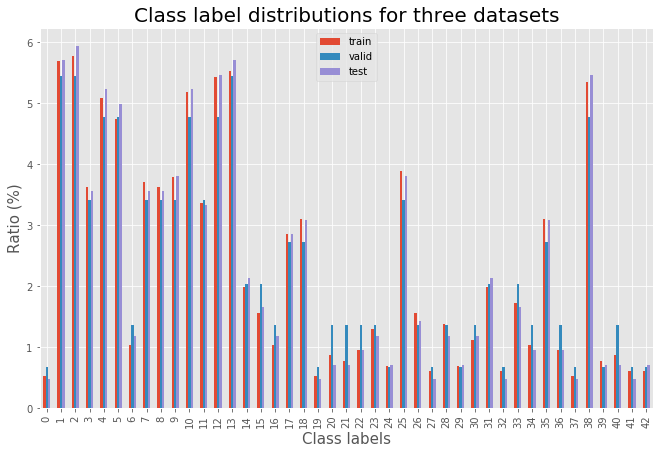

In [11]:
train_ratio = get_label_dist(y_train)
valid_ratio = get_label_dist(y_valid)
test_ratio = get_label_dist(y_test)

dist_table = pd.concat([train_ratio, valid_ratio, test_ratio], axis=1)
dist_table.columns = ['train', 'valid', 'test']
ax = dist_table.plot(kind='bar', figsize=(11, 7))
ax.set_ylabel('Ratio (%)', fontsize=15)
ax.set_xlabel('Class labels', fontsize=15)
ax.set_title('Class label distributions for three datasets', fontsize=20);

There was imbalance among the classes. The label data across the classes is not evenly distributed, however, all three data sets approximately share this characteristic

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### 1. Converting to grayscale

In [16]:
import cv2

def convert_to_grayscale_3d(x):
    x = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    return np.expand_dims(x, 2)

def convert_to_grayscale(x):
    return cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)


In [ ]:
plots.display_square_grid(X_train, False, True)

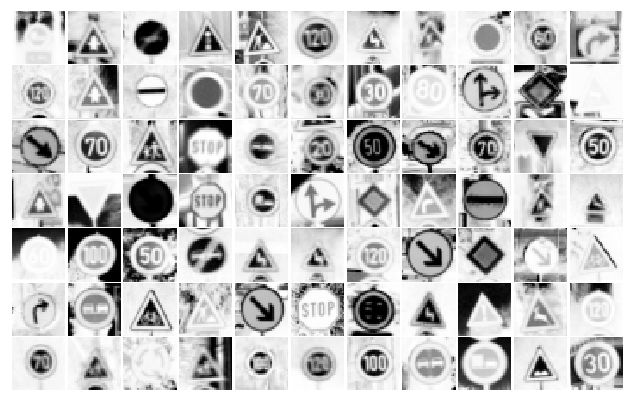

In [18]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import cv2
import traffic_signs_input as inputs
display_square_grid(X_train, False, True)

### 2. Global constrast normalization

$$
X_{i, j, k} ^{'} = s \frac {X _{i, j, k} - \bar {X}}{max \{ \epsilon, \sqrt{\lambda + \frac{1}{3rc}\sum _{i=1}^{r} \sum _{i=1}^{c} \sum _{i=1}^{3} (X _{i, j, k} - \bar {X}) ^{2}} \}}
$$

In [19]:
def global_contrast_normalization(x, s=1, eps=1e-8, lambda_=1):
    return s * (x - x.mean()) / (max(eps, (((x - x.mean())** 2).mean() + lambda_) ** .5))

### 2. MinMax normalization


In [20]:
def minmax_normalization(x, eps=1e-8):
    return (x - x.min()) / ((x.max() - x.min()) + eps)

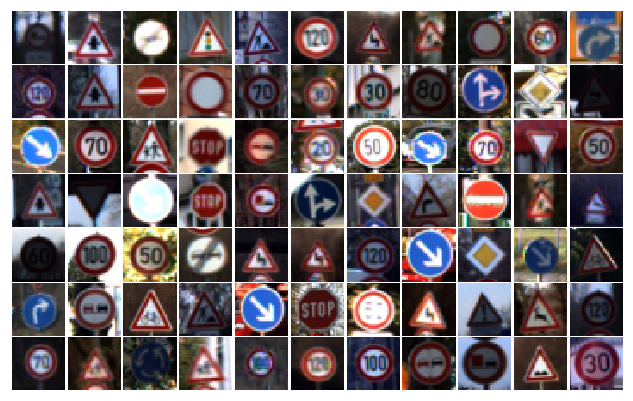

In [21]:
plots.display_square_grid(X_train, True, False)

It seems greyscale images dont benefit much from normalization. 

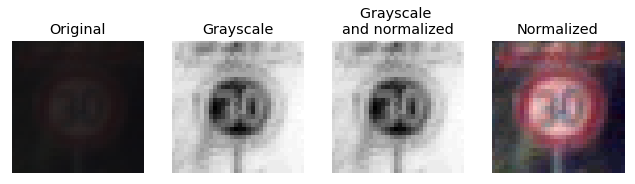

In [23]:
import plots 

img = X_train[123]
img2 = X_train[138]
plots.compare_preprocessing_methods(img)

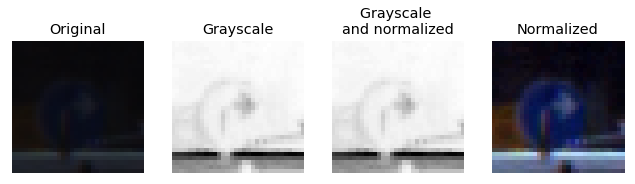

In [24]:
plots.compare_preprocessing_methods(img2)

Sample images shown in figure 1 after contrast normalization and MinMax normalization

In [25]:
def preprocess_and_save(features, labels, is_color, dest, save_output=False):
   
    if is_color:
        n_channel = 3
    else:
        n_channel = 1
    
    preprocessed = []
    for i, image in enumerate(features):
        if is_color:
            image = global_contrast_normalization(image)
            image = minmax_normalization(image)

        if not is_color:
            image = convert_to_grayscale_3d(image)
            image = minmax_normalization(image)
        preprocessed.append(image)
    preprocessed = np.array(preprocessed).reshape(
        (len(preprocessed), 32, 32, n_channel))
    
    if save_output:
        pickle.dump((preprocessed, labels), open(dest, 'wb')) 
    return preprocessed, labels


In [26]:
X_train_color, y_train_color = preprocess_and_save(
    X_train, y_train, True, "traffic-signs-data/train_preprocessed_color.p")

X_train_gray, y_train_gray = preprocess_and_save(
    X_train, y_train, False, "traffic-signs-data/train_preprocessed_gray.p")

X_valid_color, y_valid_color = preprocess_and_save(
    X_valid, y_valid, True, "traffic-signs-data/valid_preprocessed_color.p")

X_valid_gray, y_valid_gray = preprocess_and_save(
    X_valid, y_valid, False, "traffic-signs-data/valid_preprocessed_gray.p")

X_test_color, y_test_color = preprocess_and_save(
    X_test, y_test, True, "traffic-signs-data/test_preprocessed_color.p")

X_test_gray, y_test_gray = preprocess_and_save(
    X_test, y_test, False, "traffic-signs-data/test_preprocessed_gray.p")

In [19]:
utils.get_stats(X_train_color, y_train_color, "Train (color)")
utils.get_stats(X_train_gray, y_train_gray, "Train (grayscale)")
utils.get_stats(X_valid_color, y_valid_color, "Valid (color)")
utils.get_stats(X_valid_gray, y_valid_gray, "Valid (grayscale)")
utils.get_stats(X_test_color, y_test_color, "Test (color)")
utils.get_stats(X_test_gray, y_test_gray, "Test (grayscale)")


Dataset: Train (color) 
Number of examples: 34799
Image data shape: (32, 32, 3)
Min: 0.0000
Max: 1.0000
Mean: 0.3407
Std Dev: 0.2852
Number of classes: 43

Dataset: Train (grayscale) 
Number of examples: 34799
Image data shape: (32, 32, 1)
Min: 0.0000
Max: 1.0000
Mean: 0.3377
Std Dev: 0.2931
Number of classes: 43

Dataset: Valid (color) 
Number of examples: 4410
Image data shape: (32, 32, 3)
Min: 0.0000
Max: 1.0000
Mean: 0.3493
Std Dev: 0.2878
Number of classes: 43

Dataset: Valid (grayscale) 
Number of examples: 4410
Image data shape: (32, 32, 1)
Min: 0.0000
Max: 1.0000
Mean: 0.3446
Std Dev: 0.2943
Number of classes: 43

Dataset: Test (color) 
Number of examples: 12630
Image data shape: (32, 32, 3)
Min: 0.0000
Max: 1.0000
Mean: 0.3387
Std Dev: 0.2887
Number of classes: 43

Dataset: Test (grayscale) 
Number of examples: 12630
Image data shape: (32, 32, 1)
Min: 0.0000
Max: 1.0000
Mean: 0.3327
Std Dev: 0.2968
Number of classes: 43


### 3. Data augmentation 

In [14]:
import keras.preprocessing.image as io

x = X_train[5]
row_axis, col_axis, channel_axis = 0, 1, 2

# random rotation
x_r = io.random_rotation(x, rg=45, 
                         row_axis=row_axis, 
                         col_axis=col_axis, 
                         channel_axis=channel_axis)

# random horizontal shift
x_ws = io.random_shift(x, wrg=.2, hrg=0,
                       row_axis=row_axis, 
                       col_axis=col_axis, 
                       channel_axis=channel_axis)

# random vertical shift
x_hs = io.random_shift(x, wrg=0, hrg=.2, 
                       row_axis=row_axis, 
                       col_axis=col_axis, 
                       channel_axis=channel_axis)

# random shear
x_s = io.random_shear(x, intensity=.2,
                      row_axis=row_axis,
                      col_axis=col_axis, 
                      channel_axis=channel_axis)

# random zoom
x_z = io.random_zoom(x, zoom_range=(.8, 1.2), 
                     row_axis=row_axis, 
                     col_axis=col_axis, 
                     channel_axis=channel_axis)



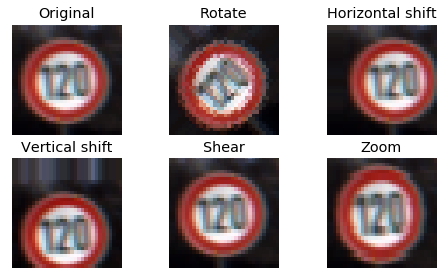

In [15]:
images = [x, x_r, x_ws, x_hs, x_s, x_z]
titles = ["Original", "Rotate", "Horizontal shift",
         "Vertical shift", "Shear", "Zoom"]

plt.figure(figsize=(8, 4.5))
for i, image in enumerate(images):
    plt.subplot(2, 3, i + 1)
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    image = global_contrast_normalization(image)
    image = minmax_normalization(image)
    plt.imshow(image)

plt.show()

In [27]:
import keras.preprocessing.image as io

def random_transform(x, seed=42, rotation_range=40,
                     width_shift_range=.2, height_shift_range=.2,
                     shear_range=.2, zoom_range = (.8, 1.2),
                    row_axis=0, col_axis=1, channel_axis=2):
    '''
    https://github.com/keras-team/keras/blob/master/keras/preprocessing/image.py
    :param x: 3D input image 
    :param seed: 
    :param rotation_range: Rotation range, in degrees.
    :param width_shift_range: Width shift range, as a float fraction of the width.
    :param height_shift_range: Height shift range, as a float fraction of the height.
    :param shear_range: Transformation intensity
    :param zoom_range: Tuple of floats; zoom range for width and height.
    :return: transformed image that has the same shape
    '''
    random.seed(seed)

    x = io.random_rotation(x, rotation_range, 
                           row_axis=row_axis, 
                           col_axis=col_axis, 
                           channel_axis=channel_axis)

    x = io.random_shift(x, width_shift_range, 
                        height_shift_range, 
                        row_axis=row_axis, 
                        col_axis=col_axis, 
                        channel_axis=channel_axis)

    x = io.random_shear(x, shear_range,
                       row_axis=row_axis, 
                        col_axis=col_axis, 
                        channel_axis=channel_axis)

    x = io.random_zoom(x, zoom_range, 
                       row_axis=row_axis, 
                       col_axis=col_axis, 
                       channel_axis=channel_axis)
    
    return x

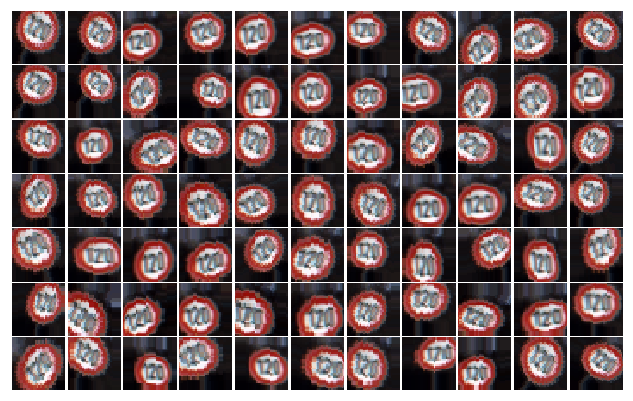

In [28]:
random.seed(42)

plt.figure(figsize=(11, 7))

for i in range(77):
    plt.subplot(7, 11, i + 1)
    plt.xticks(())
    plt.yticks(())
    image = random_transform(X_train[5])
    image = global_contrast_normalization(image)
    image = minmax_normalization(image)
    plt.imshow(image)


plt.subplots_adjust(wspace=0, hspace=0)    
plt.show()

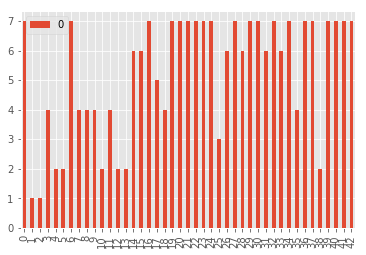

In [67]:
weights_on_scarce = .9
s = 7
train_freq = get_label_dist(y_train)
train_freq_normalized = minmax_normalization(train_freq, eps=1e-8)
n_transform_list = (1 - weights_on_scarce * train_freq_normalized) * s
n_transform_list = np.ceil(n_transform_list)
n_transform_list.plot(kind='bar')

In [44]:
def augment_examples(X, y, s=1, is_color=True,
                     dataset_name="", random_state=42, weights_on_scarce=.75,
                    show_stats=True):
    '''
    
    :param X: list of 3D image dataset, shape = (r, c, channel)
    :param y: labels
    :param s: integer scale factor 
    :param is_color: 
    :param dataset_name: name of dataset being boosted  
    :param random_state
    :return: len(X) * s number of boosted examples
    '''
    
    n_channel = X[0].shape[-1]
    n_train = len(y)
    
    train_freq = get_label_dist(y_train)
    train_freq_normalized = minmax_normalization(train_freq, eps=1e-8)
    n_transform_list = np.floor((1 - weights_on_scarce * train_freq_normalized) * s)
    
    X_augmented = [ ]
    y_augmented = [ ]

    for i, image in enumerate(X):
        sys.stdout.write('\r>> Augmenting image %s (%.1f%%)' % (
            str(i), float(i + 1) / float(n_train) * 100.0))
        sys.stdout.flush()
        n_transform = int(n_transform_list[0][y[i]])

        for j in range(n_transform):
            if n_channel == 3: # color examples
                image = random_transform(image)
                image = global_contrast_normalization(image)
                image = minmax_normalization(image)

            if n_channel == 1: # grayscale examples
                image = random_transform(image)
                image = minmax_normalization(image)

            X_augmented.append(image)
            y_augmented.append(y[ i ])

    X_augmented = np.array(X_augmented).reshape(len(X_augmented), 32, 32, n_channel )
    X_augmented, y_augmented = shuffle(X_augmented, y_augmented, random_state=random_state)
    
    if show_stats:
        utils.get_stats(X_augmented, y_augmented, dataset_name)

    return X_augmented, y_augmented


In [75]:
X_train_augmented_gray, y_train_augmented_gray = augment_examples(
    X_train_gray, y_train_gray, 4, False, "Train_augmented (gray)", weights_on_scarce=.9)

>> Augmenting image 34798 (100.0%)
Dataset: Train_augmented (gray) 
Number of examples: 43287
Image data shape: (32, 32, 1)
Min: 0.0000
Max: 1.0000
Mean: 0.3455
Std Dev: 0.3017
Number of classes: 36


In [76]:
X_train_large_gray = np.concatenate((X_train_gray, X_train_augmented_gray), axis=0)
y_train_large_gray = np.concatenate((y_train_gray, y_train_augmented_gray), axis=0)
X_train_large_gray, y_train_large_gray = shuffle(X_train_large_gray, y_train_large_gray, random_state=42)
utils.get_stats(X_train_large_gray, y_train_large_gray, "Original + Train_augmented (gray)")


Dataset: Original + Train_augmented (gray) 
Number of examples: 78086
Image data shape: (32, 32, 1)
Min: 0.0000
Max: 1.0000
Mean: 0.3420
Std Dev: 0.2979
Number of classes: 43


In [77]:
ratio = {}
freq = []
tmp_count = Counter(y_train_large_gray)
for k, v in tmp_count.items():
    ratio[k] = tmp_count[k] 
    freq.append(v)

In [78]:
np.var(freq) ** .5

761.11564239114307

In [79]:
ratio = {}
freq = []
tmp_count = Counter(y_train)
for k, v in tmp_count.items():
    ratio[k] = tmp_count[k] 
    freq.append(v)
np.var(freq) ** .5

619.42018370451081

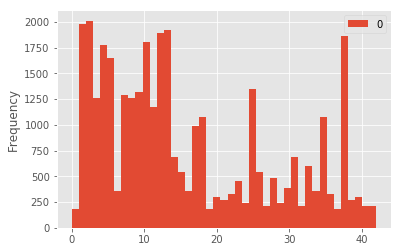

In [82]:
pd.DataFrame(y_train).plot(kind='hist', bins=43)

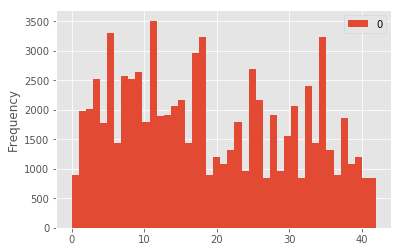

In [81]:
pd.DataFrame(y_train_large_gray).plot(kind='hist', bins=43);

In [15]:
# pickle.dump((X_train_large_gray, y_train_large_gray),
#             open("traffic-signs-data/train_large_gray.p", "wb"),
#             protocol=2)

In [17]:
X_train_augmented_color, y_train_augmented_color = augment_examples(
    X_train_color, y_train_color, 8, False, "Train_augmented (color)")

>> Augmenting image 34798 (100.0%)
Dataset: Train_augmented (color) 
Number of examples: 278392
Image data shape: (32, 32, 3)
Min: 0.0000
Max: 1.0000
Mean: 0.3593
Std Dev: 0.2938
Number of classes: 43


In [18]:
X_train_large_color = np.concatenate((X_train_color, X_train_augmented_color), axis=0)
y_train_large_color = np.concatenate((y_train_color, y_train_augmented_color), axis=0)
X_train_large_color, y_train_large_color = shuffle(X_train_large_color, y_train_large_color, random_state=42)
utils.get_stats(X_train_large_color, y_train_large_color, "Original + Train_augmented (color)")


Dataset: Original + Train_augmented (color) 
Number of examples: 313191
Image data shape: (32, 32, 3)
Min: 0.0000
Max: 1.0000
Mean: 0.3572
Std Dev: 0.2929
Number of classes: 43


In [20]:
# pickle.dump((X_train_large_color, y_train_large_color),
#             open("traffic-signs-data/train_large_color.p", "wb"),
#            protocol=4)

# Checkpoint


In [2]:
import traffic_signs_input as inputs
#X_train_large_color, y_train_large_color = prepare_arugment_dataset(is_color=True, s=4)
X_train_large_gray, y_train_large_gray, X_valid_gray, y_valid_gray = inputs.prepare_arugment_dataset(
    is_color=False, s=4) 

>> Downloading traffic-signs-data.zip 100.0%INFO Successfully downloaded traffic-signs-data.zip
INFO 123524425 bytes.
INFO Unzipping traffic-signs-data.zip
INFO traffic-signs-data.zip is successfully unzipped
INFO Data set 
traffic-signs-data/train.p, 
traffic-signs-data/valid.p, 
traffic-signs-data/test.p
INFO from url: https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
INFO successfully downloaded and unzipped
>> Augmenting image 34798 (100.0%)
Dataset: Train_augmented (gray) 
Number of examples: 139196
Image data shape: (32, 32, 1)
Min: 0.0000
Max: 1.0000
Mean: 0.3480
Std Dev: 0.3032
Number of classes: 43

Dataset: Original + Train_augmented (gray) 
Number of examples: 173995
Image data shape: (32, 32, 1)
Min: 0.0000
Max: 1.0000
Mean: 0.3459
Std Dev: 0.3012
Number of classes: 43


In [15]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


# Model Architecture

In [16]:
import tensorflow as tf
def conv2d_maxpool(features, filters, layer_name, 
                   conv_kernel_size=(5, 5), conv_strides=1, 
                   pool_kernel_size=(2, 2), pool_strides=2,
                   padding='same', is_training=True):
    
    with tf.name_scope(layer_name):
        net = tf.layers.conv2d(
            features,
            filters=filters,
            kernel_size=conv_kernel_size,
            strides=conv_strides,
            kernel_initializer= tf.truncated_normal_initializer(0.0, 0.1),
            padding='same',
            activation=tf.nn.relu)
        tf.summary.histogram('activations', net)
        
        #net = tf.layers.batch_normalization(net, training=is_training)
        
        net = tf.layers.max_pooling2d(
            net,
            pool_size=pool_kernel_size,
            strides=pool_strides,
            padding='same'
        )
    return net


def flatten(features):
    shape = features.get_shape().as_list()[1:]
    flat_dim = shape[0] * shape[1] * shape[2]
    return tf.reshape(features, [-1, flat_dim])

In [17]:
def lenet(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 6, 'Conv1', padding='valid')
    net = conv2d_maxpool(net, 16, 'Conv2', padding='valid')
    net = flatten(net)
    net = tf.layers.dense(net, 120, name='FC1', activation=tf.nn.relu)
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    logits = tf.layers.dense(net, 43, name='Out')
    return logits

def cnn_base(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 16, 'Conv1')
    net = conv2d_maxpool(net, 32, 'Conv2')
    #net = tf.nn.dropout(net, keep_prob, name='dropout')
    net = flatten(net)
    net = tf.layers.dense(net, 256, name='FC1', activation=tf.nn.relu)
    #net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits

def cnn_deep(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 16, 'Conv1')
    net = conv2d_maxpool(net, 32, 'Conv2')
    net = conv2d_maxpool(net, 64, 'Conv3')
    net = tf.nn.dropout(net, keep_prob, name='dropout')
    net = flatten(net)
    net = tf.layers.dense(net, 256, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits

def cnn_wide(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 32, 'Conv1')
    net = conv2d_maxpool(net, 64, 'Conv2')
    net = flatten(net)
    net = tf.layers.dense(net, 256, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits

def cnn_wider(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 128, 'Conv1')
    net = conv2d_maxpool(net, 256, 'Conv2')
    net = flatten(net)
    net = tf.layers.dense(net, 256, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits


def cnn_wide_deep(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 16, 'Conv1')
    net = conv2d_maxpool(features, 32, 'Conv2')
    net = conv2d_maxpool(net, 64, 'Conv3')
    net = flatten(net)
    net = tf.layers.dense(net, 256, name='FC1', activation=tf.nn.relu)
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits


def cnn_wide2(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 16, 'Conv1')
    net = conv2d_maxpool(net, 32, 'Conv2')
    net = tf.nn.dropout(net, keep_prob, name='dropout')
    net = flatten(net)
    net = tf.layers.dense(net, 1024, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits

def cnn_small_kernel(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 16, 'Conv1', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 32, 'Conv2', conv_kernel_size=(3, 3))
    net = tf.nn.dropout(net, keep_prob, name='dropout')
    net = flatten(net)
    net = tf.layers.dense(net, 256, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits

def cnn_small_kernel_wide(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 64, 'Conv1', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 128, 'Conv2', conv_kernel_size=(3, 3))
    net = tf.nn.dropout(net, keep_prob, name='dropout')
    net = flatten(net)
    net = tf.layers.dense(net, 256, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits

def cnn_small_kernel_less_dropout(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 16, 'Conv1', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 32, 'Conv2', conv_kernel_size=(3, 3))
    net = flatten(net)
    net = tf.layers.dense(net, 256, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits

def cnn_small_kernel_deep(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 16, 'Conv1', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 32, 'Conv2', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 64, 'Conv3', conv_kernel_size=(3, 3))
    net = flatten(net)
    net = tf.layers.dense(net, 256, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits

def cnn_small_kernel_deep_wide(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 32, 'Conv1', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 64, 'Conv2', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 128, 'Conv3', conv_kernel_size=(3, 3))
    net = flatten(net)
    net = tf.layers.dense(net, 256, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits

def cnn_small_kernel_deep_wide2(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 32, 'Conv1', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 64, 'Conv2', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 128, 'Conv3', conv_kernel_size=(3, 3))
    net = flatten(net)
    net = tf.layers.dense(net, 1024, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits


def cnn_small_kernel_deep_wide3(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 32, 'Conv1', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 64, 'Conv2', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 128, 'Conv3', conv_kernel_size=(3, 3))
    net = flatten(net)
    net = tf.layers.dense(net, 512, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits


def cnn_large_kernel_deep_wide2(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 32, 'Conv1')
    net = conv2d_maxpool(net, 64, 'Conv2')
    net = conv2d_maxpool(net, 128, 'Conv3')
    net = flatten(net)
    net = tf.layers.dense(net, 1024, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits


def cnn_deepx2_wide(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 16, 'Conv1', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(features, 32, 'Conv2', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 64, 'Conv3', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 128, 'Conv4', conv_kernel_size=(3, 3))
    net = flatten(net)
    net = tf.layers.dense(net, 512, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits



In [18]:
def cnn_best(features, keep_prob=0.5, is_training=True):
    net = conv2d_maxpool(features, 16, 'Conv1')
    net = conv2d_maxpool(net, 32, 'Conv2')
    net = conv2d_maxpool(net, 64,'Conv3', conv_kernel_size=(3, 3))
    net = flatten(net)
    net = tf.layers.dense(net, 256, activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob)
    net = tf.layers.dense(net, 84, activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob)
    logits = tf.layers.dense(net, 43)
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [21]:
batch_size = 128
learning_rate = .001
epochs = 50
print_every = 100
evaluate_every = 2000
checkpoint_every = 5
iteration=0

In [22]:
checkpoint_dir = "checkpoint"
if not tf.gfile.Exists(checkpoint_dir):
    tf.gfile.MakeDirs(checkpoint_dir)
    
log_dir = "log"
if not tf.gfile.Exists(log_dir):
    tf.gfile.MakeDirs(log_dir)
    
save_model_path = 'checkpoint/cnn_small_kernel_wide_grayx8_balanced_lr_001'

In [23]:
def load_batch(X, y, batch_size=batch_size):
    for start in range(0, len(X), batch_size):
        end = min(len(X), start + batch_size)
        yield X[start:end], y[start:end]

In [24]:
def evaluate(X_valid, y_valid):
    
    val_feed = {X_: X_valid,
                y_: y_valid,
                keep_prob_pl: 1.0,
                is_training_: False}
    
    val_loss, val_acc = sess.run([cost, accuracy], feed_dict=val_feed)
    
    print("\n==================================="
          "\nEpoch: {}/{}".format(e + 1, epochs),
          " Iteration: {}".format(iteration),
          "\nValidation set loss: {:.4f}".format(val_loss), 
          "\nValidation set accuracy: {:.4f}".format(val_acc),
          "\n===================================\n")
        

In [25]:
def test_accuracy(X_test, y_test):
    
    test_feed = {X_: X_test,
                y_: y_test,
                keep_prob_pl: 1.0,
                is_training_: False}
    
    test_loss, test_acc = sess.run([accuracy], feed_dict=test_feed)
    
    print("\n==================================="
          "\nTest Acc: {:.4f}".format(test_acc),
          "\n===================================\n")

In [ ]:
with tf.Graph().as_default():
    
    tf.logging.set_verbosity(tf.logging.INFO)
    
    # Inputs
    X_ = tf.placeholder(tf.float32, (None, 32, 32, 1), 'input_features')
    y_ = tf.placeholder(tf.int32, (None), 'labels')
    keep_prob_pl = tf.placeholder(tf.float32, name = "keep_prob")
    is_training_ = tf.placeholder(tf.bool, name="is_training")
    
    # CNN model
    logits = cnn_small_kernel_wide(X_, keep_prob_pl, is_training_)
    logits = tf.identity(logits, name='logits')
    
    # Loss and optimizer
    one_hot_y = tf.one_hot(y_, depth=43)
    with tf.name_scope('loss'):
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(
            labels=one_hot_y, logits=logits)
        cost = tf.reduce_mean(cross_entropy, name='xentropy')
    
    
    with tf.name_scope('train'):
        update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        with tf.control_dependencies(update_ops):
            optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) 
    
    # Performance metrics: Accuracy
    with tf.name_scope('accuracy'):
        with tf.name_scope('correct_prediction'):
            probability = tf.nn.softmax(logits, name='prediction')
            correct_pred = tf.equal(tf.argmax(probability, 1), 
                                tf.argmax(one_hot_y, 1))
        with tf.name_scope('accuracy'):
            accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
    
    tf.summary.scalar('xentropy', cost)
    tf.summary.scalar('accuracy', accuracy) 
    merged = tf.summary.merge_all()
    
    saver = tf.train.Saver()
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.local_variables_initializer())
        train_writer = tf.summary.FileWriter('log', sess.graph)
    
        for e in range(epochs):
            for x, y in load_batch(X_train_large_gray, y_train_large_gray):
                feed = {X_: x, y_: y, keep_prob_pl: 0.5, is_training_:True}
                loss, train_accuracy, _ , summary_ = sess.run([cost, accuracy, optimizer, merged], feed_dict=feed)
                train_writer.add_summary(summary_, iteration)
                
                if iteration % print_every == 0:
                    print("Epoch: {}/{}".format(e+1, epochs),
                          "Iteration: {}".format(iteration),
                          "Training set loss: {:.4f}".format(loss),
                          "Training set accuracy: {:.4f}".format(train_accuracy))
                iteration += 1

            evaluate(X_valid_gray, y_valid_gray)
            if e % checkpoint_every == 0 and e > 0:
                save_model_path_ = save_model_path + "_epoch_" + str(e) 
                saver.save(sess, save_model_path_)
                print("Model saved: {}".format(save_model_path_))

Epoch: 1/50 Iteration: 0 Training set loss: 4.0878 Training set accuracy: 0.0156
Epoch: 1/50 Iteration: 250 Training set loss: 3.4853 Training set accuracy: 0.0781
Epoch: 1/50 Iteration: 500 Training set loss: 3.2170 Training set accuracy: 0.1797
Epoch: 1/50 Iteration: 750 Training set loss: 2.7933 Training set accuracy: 0.2266
Epoch: 1/50 Iteration: 1000 Training set loss: 2.9127 Training set accuracy: 0.2031
Epoch: 1/50 Iteration: 1250 Training set loss: 2.7982 Training set accuracy: 0.2734

Epoch: 1/50  Iteration: 1359 
Validation set loss: 1.0941 
Validation set accuracy: 0.6633 

Epoch: 2/50 Iteration: 1500 Training set loss: 2.2863 Training set accuracy: 0.3516
Epoch: 2/50 Iteration: 1750 Training set loss: 2.3888 Training set accuracy: 0.2812
Epoch: 2/50 Iteration: 2000 Training set loss: 2.4198 Training set accuracy: 0.3828
Epoch: 2/50 Iteration: 2250 Training set loss: 1.8986 Training set accuracy: 0.4453
Epoch: 2/50 Iteration: 2500 Training set loss: 1.9911 Training set accur

Epoch: 14/50 Iteration: 17750 Training set loss: 1.3078 Training set accuracy: 0.6406
Epoch: 14/50 Iteration: 18000 Training set loss: 1.4340 Training set accuracy: 0.5625
Epoch: 14/50 Iteration: 18250 Training set loss: 1.2920 Training set accuracy: 0.6016
Epoch: 14/50 Iteration: 18500 Training set loss: 1.2019 Training set accuracy: 0.6406
Epoch: 14/50 Iteration: 18750 Training set loss: 1.1742 Training set accuracy: 0.6406
Epoch: 14/50 Iteration: 19000 Training set loss: 1.4014 Training set accuracy: 0.6172

Epoch: 14/50  Iteration: 19026 
Validation set loss: 0.3150 
Validation set accuracy: 0.9227 

Epoch: 15/50 Iteration: 19250 Training set loss: 1.3429 Training set accuracy: 0.6250
Epoch: 15/50 Iteration: 19500 Training set loss: 1.4079 Training set accuracy: 0.6250
Epoch: 15/50 Iteration: 19750 Training set loss: 1.1700 Training set accuracy: 0.6641
Epoch: 15/50 Iteration: 20000 Training set loss: 1.3606 Training set accuracy: 0.5391
Epoch: 15/50 Iteration: 20250 Training set l


Epoch: 26/50  Iteration: 35334 
Validation set loss: 0.2828 
Validation set accuracy: 0.9354 

Model saved: checkpoint/cnn_wide_grayx8_balanced_lr_001_epoch_25
Epoch: 27/50 Iteration: 35500 Training set loss: 1.0875 Training set accuracy: 0.6953
Epoch: 27/50 Iteration: 35750 Training set loss: 1.0406 Training set accuracy: 0.6797
Epoch: 27/50 Iteration: 36000 Training set loss: 1.2883 Training set accuracy: 0.5781
Epoch: 27/50 Iteration: 36250 Training set loss: 1.0215 Training set accuracy: 0.7266
Epoch: 27/50 Iteration: 36500 Training set loss: 0.7982 Training set accuracy: 0.7266

Epoch: 27/50  Iteration: 36693 
Validation set loss: 0.2545 
Validation set accuracy: 0.9370 

Epoch: 28/50 Iteration: 36750 Training set loss: 1.1989 Training set accuracy: 0.6250
Epoch: 28/50 Iteration: 37000 Training set loss: 1.3636 Training set accuracy: 0.6094
Epoch: 28/50 Iteration: 37250 Training set loss: 1.0180 Training set accuracy: 0.7031
Epoch: 28/50 Iteration: 37500 Training set loss: 1.1412

Epoch: 39/50 Iteration: 52500 Training set loss: 0.6947 Training set accuracy: 0.7812


In [118]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

def test_model(save_model_path, test_features, test_labels):
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('input_features:0')
        loaded_y = loaded_graph.get_tensor_by_name('labels:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy/accuracy/accuracy:0')
        loaded_preds = loaded_graph.get_tensor_by_name('accuracy/correct_prediction/prediction:0')

        steps = 0
        stats = {
            'steps': [],
            'test_acc': [],
            'test_precision': [],
            'test_recall': []
        }
        
        # Get accuracy in batches for memory limitations
        for x, y in load_batch(test_features, test_labels):
            steps += 1
            test_feed = {loaded_x: x,
                         loaded_y: y,
                         loaded_keep_prob: 1.0}

            test_preds, test_acc = sess.run([loaded_preds, loaded_acc], feed_dict=test_feed)
            #test_precision = recall_score(y, test_preds)
            #test_recall = precision_score(y, test_preds)

            stats['steps'].append(steps)
            stats['test_acc'].append(test_acc)
            #stats['test_precision'].append(test_precision)
            #stats['test_recall'].append(test_recall)
        
    return stats

In [119]:
test_features, test_labels = X_valid_gray[:100], y_valid_gray[:100]
test_model(save_model_path, test_features, test_labels)

INFO:tensorflow:Restoring parameters from checkpoint/lenet_gray_lr_001
INFO Restoring parameters from checkpoint/lenet_gray_lr_001


{'steps': [1, 2, 3, 4, 5, 6, 7],
 'test_acc': [0.125, 0.0, 0.0, 0.0625, 0.125, 0.0, 0.0],
 'test_precision': [],
 'test_recall': []}

In [120]:
n_samples = 5
top_n_predictions = 5


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web


For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")